In [5]:
!wget https://cv-course.demo.3divi.com/download/task2/practical
!unzip practical

--2026-01-19 08:05:47--  https://cv-course.demo.3divi.com/download/task2/practical
Resolving cv-course.demo.3divi.com (cv-course.demo.3divi.com)... 37.61.211.149
Connecting to cv-course.demo.3divi.com (cv-course.demo.3divi.com)|37.61.211.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77175 (75K) [application/zip]
Saving to: ‘practical’

practical           100%[===================>]  75.37K   490KB/s    in 0.2s    

2026-01-19 08:05:47 (490 KB/s) - ‘practical’ saved [77175/77175]

Archive:  practical
  inflating: TestImg.jpg             
  inflating: opencv.png              


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
# Считываем картинку (BGR)
img = cv2.imread('TestImg.jpg', cv2.IMREAD_COLOR)
# Переводим в RGB для matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
# Нормализация в диапазон [-1, 1]
# Формула из методы: img / 127.5 - 1.0
img_normed = img / 127.5 - 1.0
print(f"Original: mean={img.mean():.2f}, std={img.std():.2f}")
print(f"Normed:   mean={img_normed.mean():.2f}, std={img_normed.std():.2f}")

Original: mean=80.38, std=53.02
Normed:   mean=-0.37, std=0.42


In [9]:
# Готовим вторую картинку (OpenCV logo)
# Грузим в ч/б
img_cv = cv2.imread('opencv.png', cv2.IMREAD_GRAYSCALE)

# Ресайзим под размер первой
h, w = img.shape[:2]
img_cv_resized = cv2.resize(img_cv, (w, h), interpolation=cv2.INTER_AREA)

# Инвертируем (было белое -> стало черное и наоборот)
img_cv_inv = 255 - img_cv_resized

In [10]:
# Делаем маску: левая половина 0, правая 255
mask = np.zeros(img.shape[:2], dtype='uint8')
mask[:, w//2:] = 255

# Блендинг с коэффициентом 0.5
lam = 0.5
# Важно: добавляем np.newaxis к ч/б, чтобы размерности совпали с RGB
img_composed = lam * img + (1 - lam) * img_cv_inv[..., np.newaxis]

# Накладываем маску (зануляем правую часть, где mask != 0)
# В методичке через np.putmask, но можно и так:
img_composed[mask > 0] = 0

# Возвращаем в uint8, чтобы рисовать поверх
img_composed = img_composed.astype('uint8')

array([[[234, 241, 248],
        [238, 240, 242],
        [246, 243, 237],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[243, 241, 244],
        [247, 235, 235],
        [206, 184, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[240, 240, 238],
        [255, 241, 236],
        [198, 165, 155],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[239, 242, 244],
        [252, 244, 240],
        [176, 151, 142],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[251, 239, 239],
        [254, 239, 239],
        [199, 178, 179],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[235, 240, 236],
        [245, 247, 243],
        [244, 241, 238],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
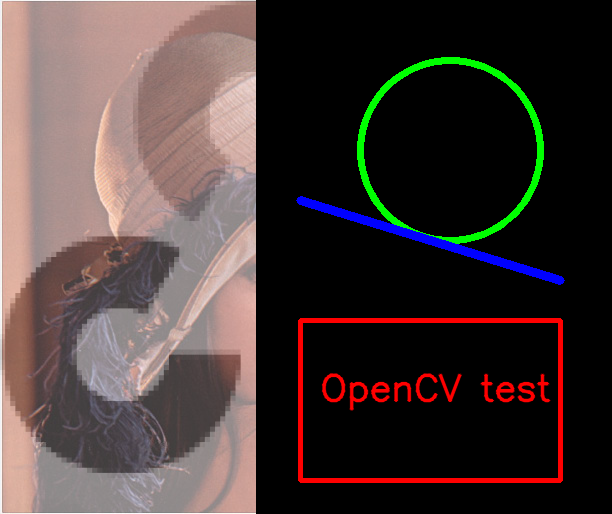

In [11]:
# Добавляем паддинг 100px справа
img_draw = cv2.copyMakeBorder(img_composed, 0, 0, 0, 100, cv2.BORDER_CONSTANT)

# Рисуем фигуры по координатам из задания
# Круг
cv2.circle(img_draw, (450, 150), 90, (0, 255, 0), 5)
# Линия
cv2.line(img_draw, (300, 200), (560, 280), (0, 0, 255), 7)
# Прямоугольник
cv2.rectangle(img_draw, (300, 320), (560, 480), (255, 0, 0), 3)
# Текст
cv2.putText(img_draw, 'OpenCV test', (320, 400), cv2.FONT_HERSHEY_SIMPLEX,
            1.2, (255, 0, 0), 2, cv2.LINE_AA)

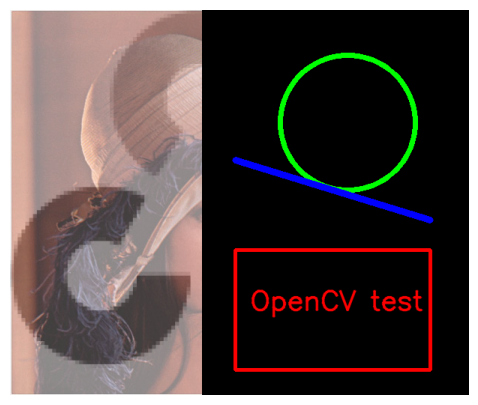

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(img_draw)
plt.axis('off') # чтобы не мешались оси
plt.show()